<p>Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.</p>
<p>For any problem we need to explore the data in order to get an intuition</p>
<p style="color:blue;">Numpy, Pandas libraries provide python the flexibility to work using Matrices. Matrices take less time than python dictionaries or lists.</p>

In [18]:
import numpy as np
import pandas as pd

Lets start exploring the data....

In [19]:
data1 = pd.read_table('C:/Users/Naveen/Documents/GitHub1/Data_Science/data1.txt', delimiter=',', header=None)

In [20]:
data1.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


There are no column names in the dataset. So we are seeing 0,1.
Lets rename the column names

In [21]:
data1=data1.rename(columns = {0:'population',1:'profits'})

In [22]:
data1.head()

,population,profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [23]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
profits,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


We can see the columnwise basic stats in the table above. Negative profits infer loss<br>
Here -2.6807 implies loss. This gives us a little information about the dataset.<br>
But it is often useful to understand the data by visualizing it.<br>
Scatter plot results for this data can be seen below

In [24]:
import matplotlib.pyplot as plt

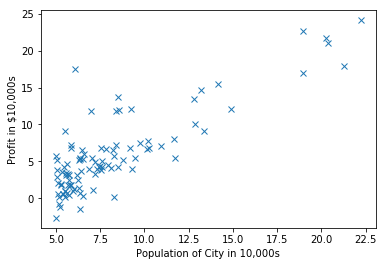

In [25]:
plt.plot(data1['population'],data1['profits'],'x')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

$$
Hypothesis \ is \ given \ by \ linear \ model \dots \dots                          
h_{\theta}(x) = \theta^T x = \theta_{0} + \theta_{1} x_{1} \\
Cost \ function \ is \ given \ by \dots \dots 
J(\theta) = \displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 \\
\displaystyle{Our \ goal} \ is \ to \ find \ a \ better \ prediction \ for \ our \ model \ which \ has \ less \ error\\
i.e. \ We \ have \ to \ predict \ theta \ values \ so \ that \ J(\theta) \ is \ minimum \\
We \ use \ batch \ gradient \ descent \ algorithm. \ Each \ iteration \ performs \ the \ update \\
\theta_j:=\theta_j-\alpha \frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}
$$
With each step of gradient descent, our parameters $\theta_j$ come closer to the
optimal values that will achieve the lowest cost $J(\theta)$ <br>
We add another dimension to our data to accommodate the $\theta_0$ intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [26]:
#Initializing all the data
m = data1.shape[0]
X = pd.DataFrame(np.ones((m, 1)),columns = ['Intercept'])
X['population'] = data1['population'] #Input vdataframe
y = data1['profits']
theta = pd.Series(np.zeros(2), index=list(X.columns))  #parameters for our model
iterations = 1500;
alpha = 0.01;

In [27]:
#Cost function at theta=[0, 0]
def cost_function(X,y,theta):
    m = data1.shape[0]
    J = ((X.dot(theta) - y).dot(X.dot(theta) - y))/(2*m)
    return J
cost_function(X,y,theta)

32.072733877455676

In [28]:
def gradient_descent(X,y,theta,alpha,iterations):
    for iters in range(iterations):
        theta = theta - (alpha/m)*((X.dot(theta) - y).dot(X))
    return theta
new_theta = gradient_descent(X,y,theta,alpha,iterations)

In [29]:
cost_function(X,y,new_theta) #cost after 1500 iterations

4.4833882565877259

In [30]:
iterations = 1600
new_theta = gradient_descent(X,y,theta,alpha,iterations)

In [31]:
cost_function(X,y,new_theta) #cost after 1600 iterations

4.4814445025576388

We can see that the cost function is decreasing in a very little amount after certain intervals

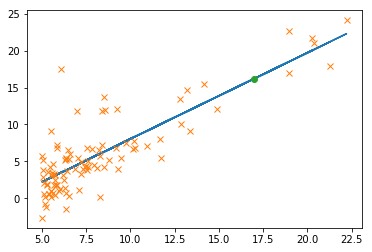

In [32]:
plt.plot(X['population'], X.dot(new_theta))
plt.plot(data1['population'],data1['profits'],'x')
plt.plot(17, new_theta[0]+17*new_theta[1],'o')#example prediction
plt.show()

All our predictions lie on the linear hypothesis. This is a simplest model.